In [1]:
# Import required libraries and dependencies
import pandas as pd
import hvplot.pandas
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [2]:
import matplotlib.pyplot as plt  # Standard pyplot import

In [3]:
# Load the data into a Pandas DataFrame
df_market_data = pd.read_csv(
    "Resources/crypto_market_data.csv",
    index_col="coin_id")

# Display sample data
df_market_data.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384
binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195
chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186
cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756
litecoin,-0.06341,6.60221,7.28931,1.21662,-17.23960,27.49919,-12.66408


In [4]:
df_market_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 41 entries, bitcoin to digibyte
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   price_change_percentage_24h   41 non-null     float64
 1   price_change_percentage_7d    41 non-null     float64
 2   price_change_percentage_14d   41 non-null     float64
 3   price_change_percentage_30d   41 non-null     float64
 4   price_change_percentage_60d   41 non-null     float64
 5   price_change_percentage_200d  41 non-null     float64
 6   price_change_percentage_1y    41 non-null     float64
dtypes: float64(7)
memory usage: 2.6+ KB


In [5]:
# Generate summary statistics
df_market_data.describe()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,-0.269686,4.497147,0.185787,1.545693,-0.094119,236.537432,347.667956
std,2.694793,6.375218,8.376939,26.344218,47.365803,435.225304,1247.842884
min,-13.527860,-6.094560,-18.158900,-34.705480,-44.822480,-0.392100,-17.567530
25%,-0.608970,0.047260,-5.026620,-10.438470,-25.907990,21.660420,0.406170
50%,-0.063410,3.296410,0.109740,-0.042370,-7.544550,83.905200,69.691950
75%,0.612090,7.602780,5.510740,4.578130,0.657260,216.177610,168.372510
max,4.840330,20.694590,24.239190,140.795700,223.064370,2227.927820,7852.089700


In [6]:
# Plot your data to see what's in your DataFrame
df_market_data.hvplot.line(
    width=800,
    height=400,
    rot=90
)

:NdOverlay   [Variable]
   :Curve   [coin_id]   (value)

---

### Prepare the Data

In [7]:
# Use the `StandardScaler()` module from scikit-learn to normalize the data from the CSV file
scaler = StandardScaler()

In [8]:
df_scaled_data = scaler.fit_transform(df_market_data)
df_scaled_data

array([[ 5.08529366e-01,  4.93193071e-01,  7.72200433e-01,
         2.35459633e-01, -6.74950963e-02, -3.55953481e-01,
        -2.51636882e-01],
       [ 1.85445894e-01,  9.34445040e-01,  5.58692121e-01,
        -5.43409317e-02, -2.73482725e-01, -1.15759474e-01,
        -1.99352110e-01],
       [ 2.17739616e-02, -7.06336853e-01, -2.16804207e-02,
        -6.10301536e-02,  8.00452481e-03, -5.50246924e-01,
        -2.82060506e-01],
       [-4.07643829e-02, -8.10928066e-01,  2.49457974e-01,
        -5.03879651e-02, -3.73164019e-01, -4.58258816e-01,
        -2.95546142e-01],
       [ 1.19303608e+00,  2.00095907e+00,  1.76061001e+00,
         5.45842065e-01, -2.91202870e-01, -4.99847761e-01,
        -2.70316950e-01],
       [ 8.91870708e-01,  1.32729453e+00,  8.00214184e-01,
        -5.71478992e-02,  7.78653106e-01, -1.88231917e-01,
        -2.25532605e-01],
       [ 1.13972400e-02,  2.57225091e+00,  1.10164693e+00,
        -4.90495415e-01, -9.31954023e-01,  3.87758986e-01,
        -1.8284399

In [9]:
# Create a DataFrame with the scaled data
df_scaled = pd.DataFrame(df_scaled_data, columns=df_market_data.columns)

# Copy the crypto names from the original data
# Set the coinid column as index
df_scaled.set_index(df_market_data.index, inplace=True)


# Display sample data
df_scaled.head()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317


---

### Find the Best Value for k Using the Original Data.

In [10]:
# Create a list with the number of k-values from 1 to 11
k_ = [i for i in range(2,12)]
k_

[2, 3, 4, 5, 6, 7, 8, 9, 10, 11]

In [11]:
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(df_scaled)

C:\Users\aKost\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=2, random_state=42)

C:\Users\aKost\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\aKost\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\aKost\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\aKost\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Window

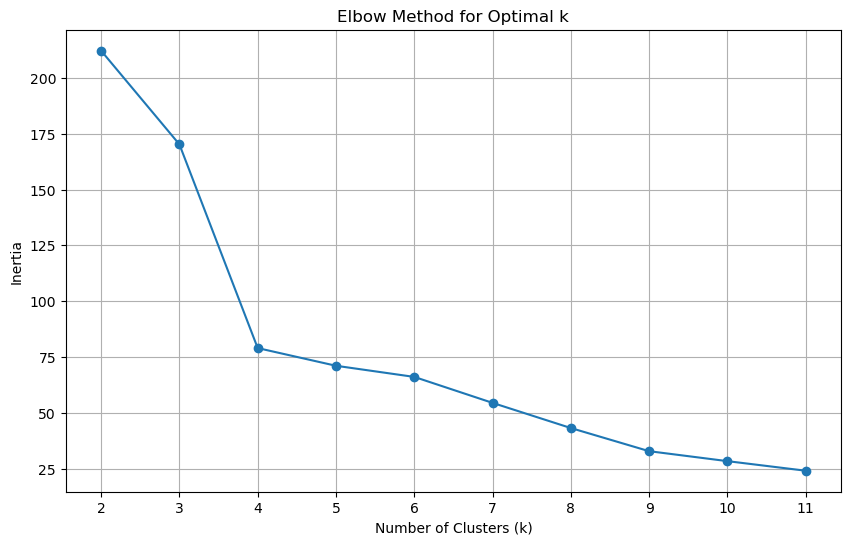

In [12]:
# Create an empty list to store the inertia values
inertia_values = list()

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using `df_market_data_scaled`
# 3. Append the model.inertia_ to the inertia list
for k in k_:
    if k != 1:
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(df_scaled)
        inertia_values.append(kmeans.inertia_)

elbow_data = {'Number of Clusters': k_, 'Inertia': inertia_values}

plt.figure(figsize=(10, 6))
plt.plot(elbow_data['Number of Clusters'], elbow_data['Inertia'], marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.xticks(k_)
plt.grid(True)
plt.show()

<Axes: xlabel='Number of clusters', ylabel='Inertia'>

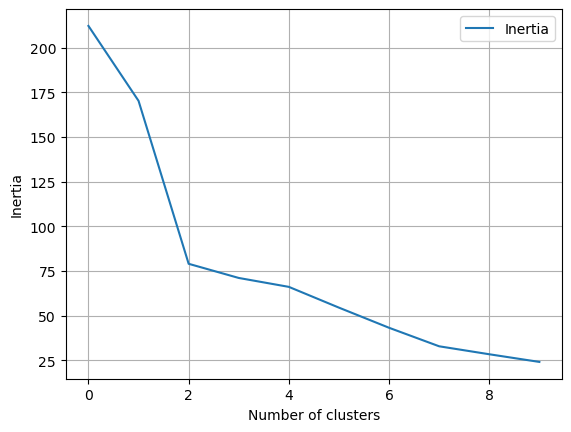

In [20]:
# Create a dictionary with the data to plot the Elbow curve
elb_df = pd.DataFrame(elbow_data)

# Create a DataFrame with the data to plot the Elbow curve
elb_df[['Inertia']].plot(xlabel='Number of clusters', ylabel='Inertia', grid=True)

#### Answer the following question: 

**Question:** What is the best value for `k`?

**Answer:** K should be 3. While the elbow does begin to flatten out at k=2, having an odd number of k allows for easier tie-breaking should it become necessary. 

---

### Cluster Cryptocurrencies with K-means Using the Original Data

In [21]:
# Initialize the K-Means model using the best value for k
k_mod = KMeans(n_clusters=3, random_state=42)

In [22]:
# Fit the K-Means model using the scaled data
k_mod.fit(df_scaled)

C:\Users\aKost\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=3, random_state=42)

In [23]:
# Predict the clusters to group the cryptocurrencies using the scaled data
cluster_labels = k_mod.predict(df_scaled)

# Print the resulting array of cluster values.
print(cluster_labels)

[0 0 2 2 0 0 0 0 0 2 2 2 2 0 2 0 2 2 0 2 2 0 2 2 2 2 2 2 0 2 2 2 0 0 2 2 1
 2 2 2 2]


In [24]:
# Create a copy of the DataFrame
df_scaled_copy = df_scaled.copy(deep=True)

In [27]:
len(df_scaled_copy), len(cluster_labels)

(41, 41)

In [35]:
# Add a new column to the DataFrame with the predicted clusters
df_scaled_copy['cluster'] = list(cluster_labels)

# Display sample data
df_scaled_copy.head()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y,cluster
coin_id,,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637,0
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352,0
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061,2
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546,2
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317,0


In [36]:
# Create a scatter plot using hvPlot by setting 
# `x="price_change_percentage_24h"` and `y="price_change_percentage_7d"`. 
# Color the graph points with the labels found using K-Means and 
# add the crypto name in the `hover_cols` parameter to identify 
# the cryptocurrency represented by each data point.

import hvplot.pandas

scatter_plot = df_scaled_copy.hvplot.scatter(
    x="price_change_percentage_24h",
    y="price_change_percentage_7d",
    c="cluster",
    cmap='viridis',
    hover_cols=["coin_id"],
    title='Crypto Clusters Based on Price Changes'
)

scatter_plot

:Scatter   [price_change_percentage_24h]   (price_change_percentage_7d,cluster,coin_id)

---

### Optimize Clusters with Principal Component Analysis.

In [38]:
# Create a PCA model instance and set `n_components=3`.
pca_ = PCA(n_components=3, random_state=42)
pca_.fit(df_scaled_data)

PCA(n_components=3, random_state=42)

In [44]:
# Use the PCA model with `fit_transform` to reduce to 
# three principal components.
# View the first five rows of the DataFrame. 

pca_transformed = pca_.transform(df_scaled_data)

df_pca = pd.DataFrame(
    pca_transformed,
    columns=['PC1', 'PC2', 'PC3'],  # Names of the principal components
    index=df_scaled.index  # Index remains the same
)

df_pca.head()

,PC1,PC2,PC3
coin_id,,,
bitcoin,-0.600667,0.842760,0.461595
ethereum,-0.458261,0.458466,0.952877
tether,-0.433070,-0.168126,-0.641752
ripple,-0.471835,-0.222660,-0.479053
bitcoin-cash,-1.157800,2.041209,1.859715


In [45]:
# Retrieve the explained variance to determine how much information 
# can be attributed to each principal component.
explained_variance_ratio = pca_.explained_variance_ratio_

explained_variance_df = pd.DataFrame(
    explained_variance_ratio,
    columns=['Explained Variance Ratio'],  # Name of the column
    index=['PC1', 'PC2', 'PC3']  # Names of the principal components
)

explained_variance_df

,Explained Variance Ratio
PC1,0.371986
PC2,0.347008
PC3,0.176038


In [47]:
sum(explained_variance_ratio)

0.8950316570309841

#### Answer the following question: 

**Question:** What is the total explained variance of the three principal components?

**Answer:** 0.8950316570309841


In [48]:
# Create a new DataFrame with the PCA data.
# Creating a DataFrame with the PCA data
# Copy the crypto names from the original data
# Set the coinid column as index

df_pca = pd.DataFrame(
    pca_transformed,
    columns=['PC1', 'PC2', 'PC3'],  # Names of the principal components
    index=df_scaled.index  # Index remains the same
)

# Display sample data
df_pca.head()

,PC1,PC2,PC3
coin_id,,,
bitcoin,-0.600667,0.842760,0.461595
ethereum,-0.458261,0.458466,0.952877
tether,-0.433070,-0.168126,-0.641752
ripple,-0.471835,-0.222660,-0.479053
bitcoin-cash,-1.157800,2.041209,1.859715


---

### Find the Best Value for k Using the PCA Data

In [50]:
# Create a list with the number of k-values from 1 to 11
k_

[2, 3, 4, 5, 6, 7, 8, 9, 10, 11]

C:\Users\aKost\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\aKost\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\aKost\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\aKost\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Window

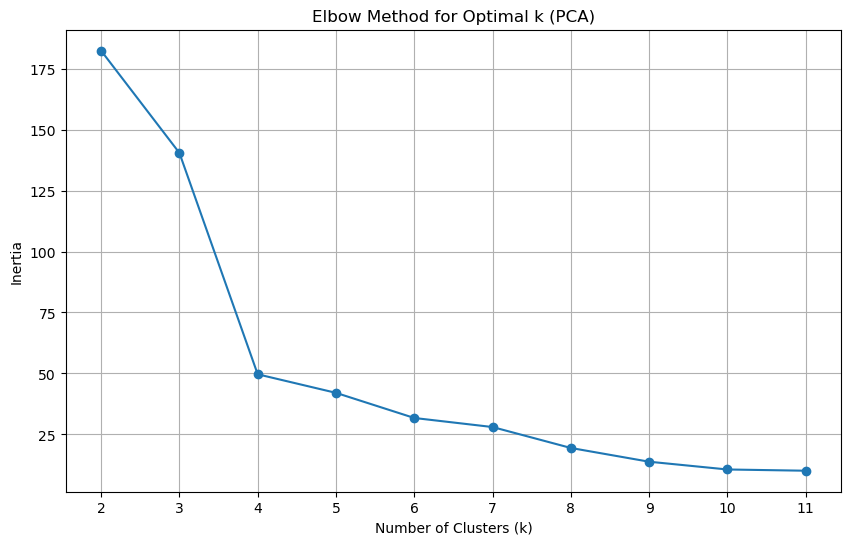

In [51]:
# Create an empty list to store the inertia values
inertia_values_2 = list()

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using `df_market_data_pca`
# 3. Append the model.inertia_ to the inertia list

for k in k_:
    if k != 1:
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(df_pca)
        inertia_values_2.append(kmeans.inertia_)

elbow_data_2 = {'Number of Clusters': k_, 'Inertia': inertia_values_2}

plt.figure(figsize=(10, 6))
plt.plot(elbow_data_2['Number of Clusters'], elbow_data_2['Inertia'], marker='o')
plt.title('Elbow Method for Optimal k (PCA)')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia'
plt.xticks(k_)
plt.grid(True)
plt.show()

#### Answer the following questions: 

* **Question:** What is the best value for `k` when using the PCA data?

  * **Answer:** 5. Although the curve begins to flatten at 4, odd numbers are better tie-breakers if necessary. 


* **Question:** Does it differ from the best k value found using the original data?

  * **Answer:** Yes. Before PCA, the best k-value was 3.

### Cluster Cryptocurrencies with K-means Using the PCA Data

In [52]:
# Initialize the K-Means model using the best value for k
k_pca = KMeans(n_clusters=5, random_state=42)

In [53]:
# Fit the K-Means model using the PCA data
k_pca.fit(df_pca)

C:\Users\aKost\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=5, random_state=42)

In [54]:
# Predict the clusters to group the cryptocurrencies using the PCA data
cluster_labels_2 = k_pca.predict(df_pca)

# Print the resulting array of cluster values.
print(cluster_labels_2)

[4 4 2 2 4 4 4 4 4 0 2 2 2 4 0 0 2 0 4 2 2 4 2 0 2 2 0 2 4 2 0 0 3 0 0 2 1
 2 0 2 2]


In [55]:
# Create a copy of the DataFrame with the PCA data
df_pca_copy = df_pca.copy(deep=True)

# Add a new column to the DataFrame with the predicted clusters
df_pca_copy['cluster'] = cluster_labels_2

# Display sample data
df_pca_copy.head()

,PC1,PC2,PC3,cluster
coin_id,,,,
bitcoin,-0.600667,0.842760,0.461595,4
ethereum,-0.458261,0.458466,0.952877,4
tether,-0.433070,-0.168126,-0.641752,2
ripple,-0.471835,-0.222660,-0.479053,2
bitcoin-cash,-1.157800,2.041209,1.859715,4


In [58]:
# Create a scatter plot using hvPlot by setting 
# `x="PC1"` and `y="PC2"`. 
# Color the graph points with the labels found using K-Means and 
# add the crypto name in the `hover_cols` parameter to identify 
# the cryptocurrency represented by each data point.

sct2 = df_pca_copy.hvplot.scatter(
    x='PC1', 
    y='PC2', 
    by='cluster',  # Color by cluster labels
    hover_cols=['coin_id'],  # Display cryptocurrency name on hover
    title='PCA Scatter Plot with K-Means Clusters'
)
sct2

:NdOverlay   [cluster]
   :Scatter   [PC1]   (PC2,coin_id)

### Visualize and Compare the Results

In this section, you will visually analyze the cluster analysis results by contrasting the outcome with and without using the optimization techniques.

In [60]:
# Composite plot to contrast the scatter

plots = (scatter_plot + sct2).cols(1)
plots

:Layout
   .Scatter.I   :Scatter   [price_change_percentage_24h]   (price_change_percentage_7d,cluster,coin_id)
   .NdOverlay.I :NdOverlay   [cluster]
      :Scatter   [PC1]   (PC2,coin_id)

TypeError: unsupported operand type(s) for +: 'Axes' and 'list'

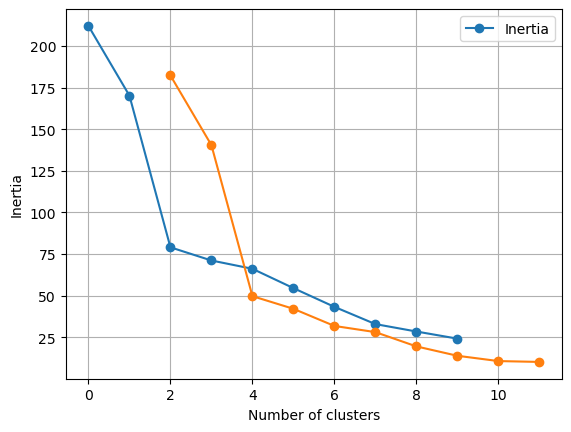

In [66]:
# Composite plot to contrast the elbows
el1 = elb_df[['Inertia']].plot(xlabel='Number of clusters', ylabel='Inertia', marker='o', grid=True)
el2 = plt.plot(elbow_data_2['Number of Clusters'], elbow_data_2['Inertia'], marker='o')
plots = (el1 + el2).cols(1) 
plots

#### Answer the following question: 

  * **Question:** After visually analyzing the cluster analysis results, what is the impact of using fewer features to cluster the data using K-Means?

  * **Answer:** Not really sure... Doesn't look like a significant difference to be honest. Using PCA may provide a greater number of clusters. 